In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
df = pd.read_csv('../data/Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
# Check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
# Basic statistical details
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

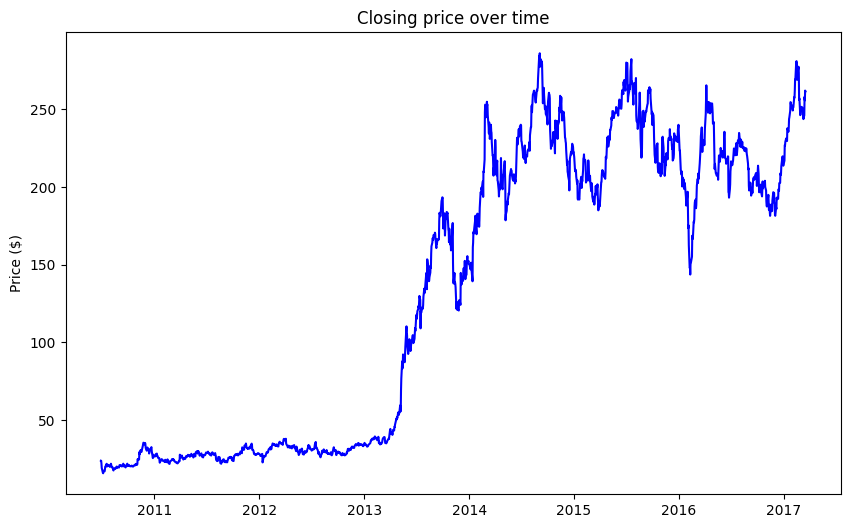

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'], color='b')
plt.title('Closing price over time')
plt.ylabel('Price ($)')
plt.show()

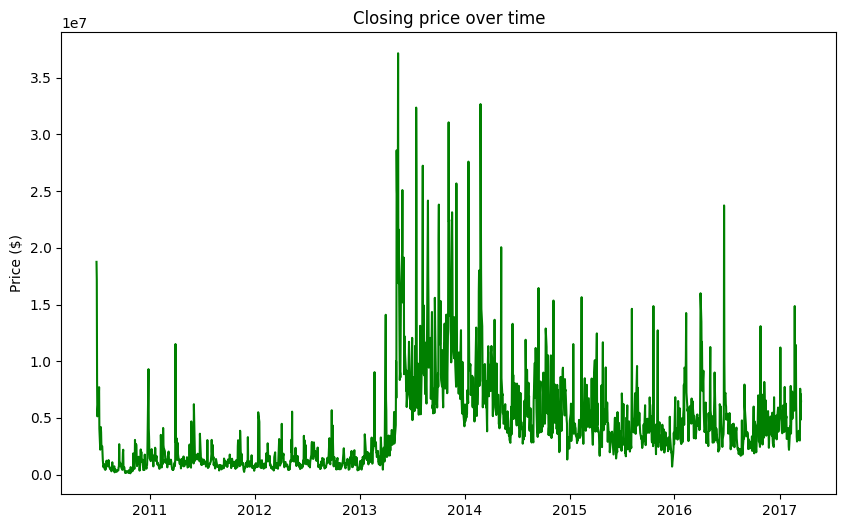

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df['Volume'], color='g')
plt.title('Closing price over time')
plt.ylabel('Price ($)')
plt.show()

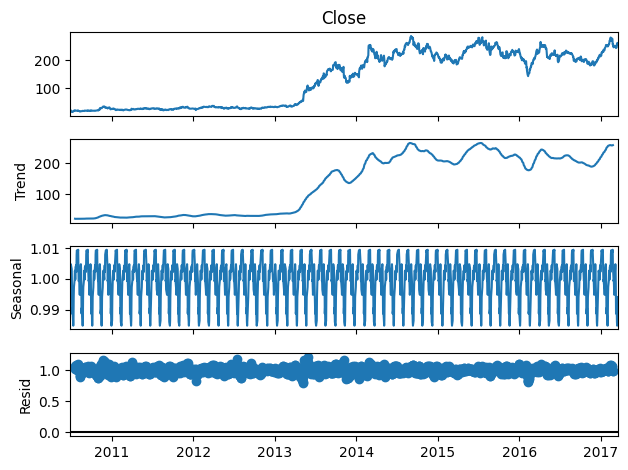

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig = decomposition.plot()
plt.show()

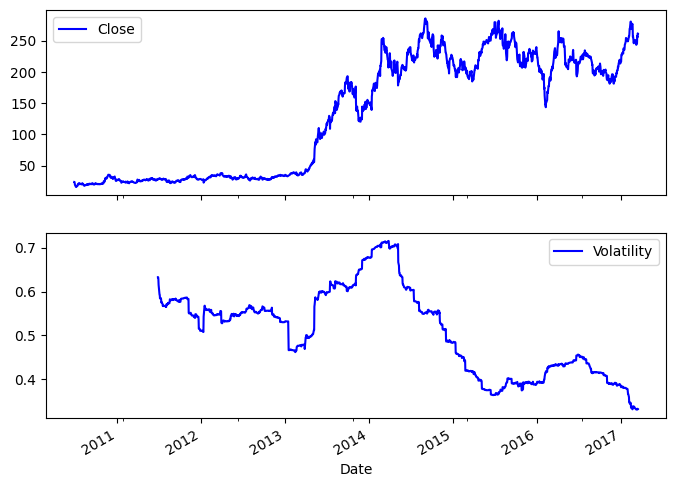

In [20]:
# Volatility Analysis
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=252).std() * np.sqrt(252)
df[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))
plt.show()

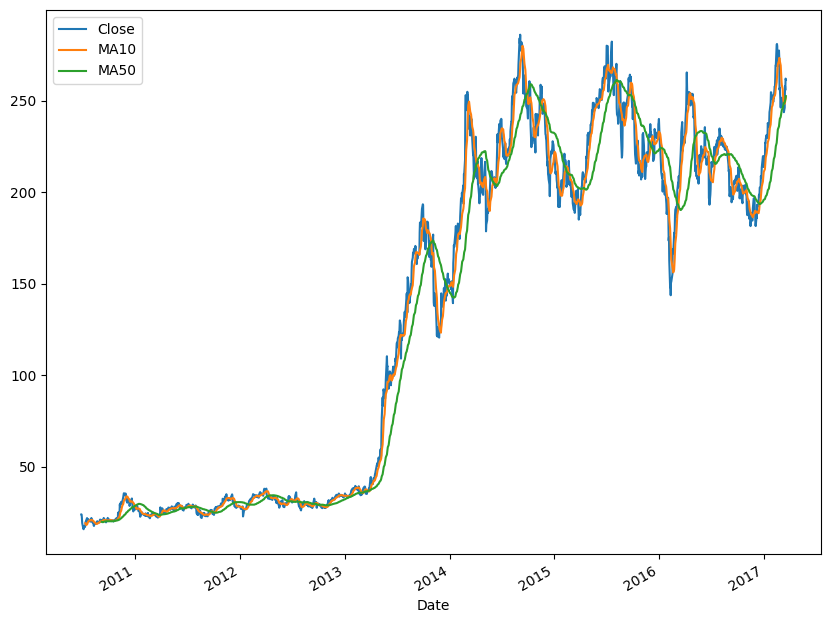

In [21]:
# Moving Average Analysis
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df[['Close','MA10','MA50']].plot(label='Tesla', figsize=(10,8))
plt.show()

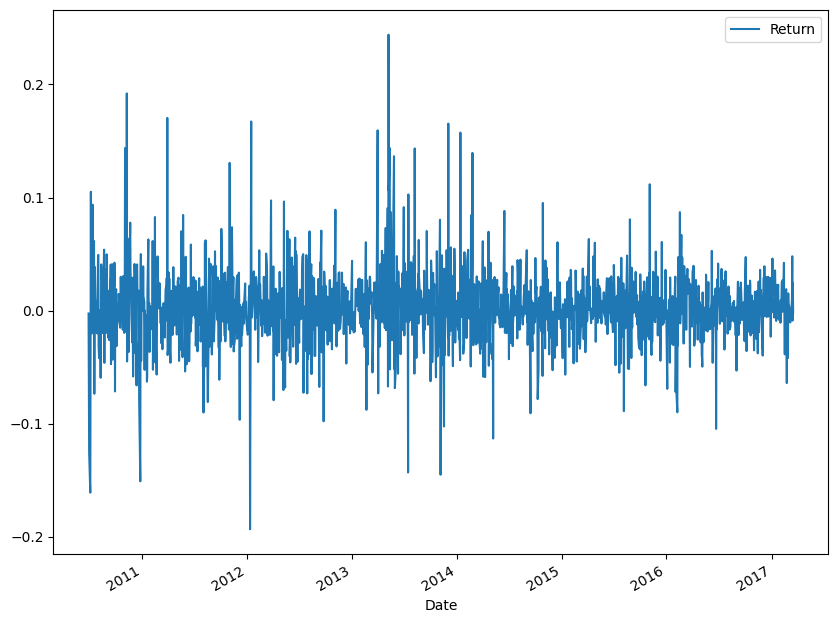

In [22]:
# Return Analysis
df['Return'] = df['Close'].pct_change()
df[['Return']].plot(label='Return', figsize=(10,8))
plt.show()

In [23]:
# Prepare the data for Prophet
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

prophet_df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [24]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

11:54:40 - cmdstanpy - INFO - Chain [1] start processing
11:54:40 - cmdstanpy - INFO - Chain [1] done processing


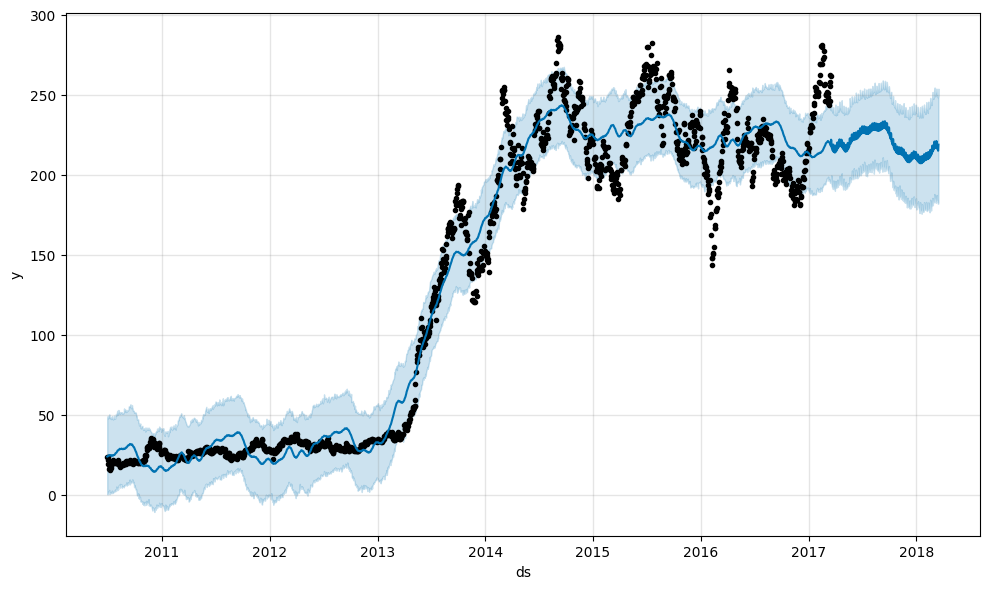

In [25]:
# Visualize the forecast
model.plot(forecast)
plt.show()

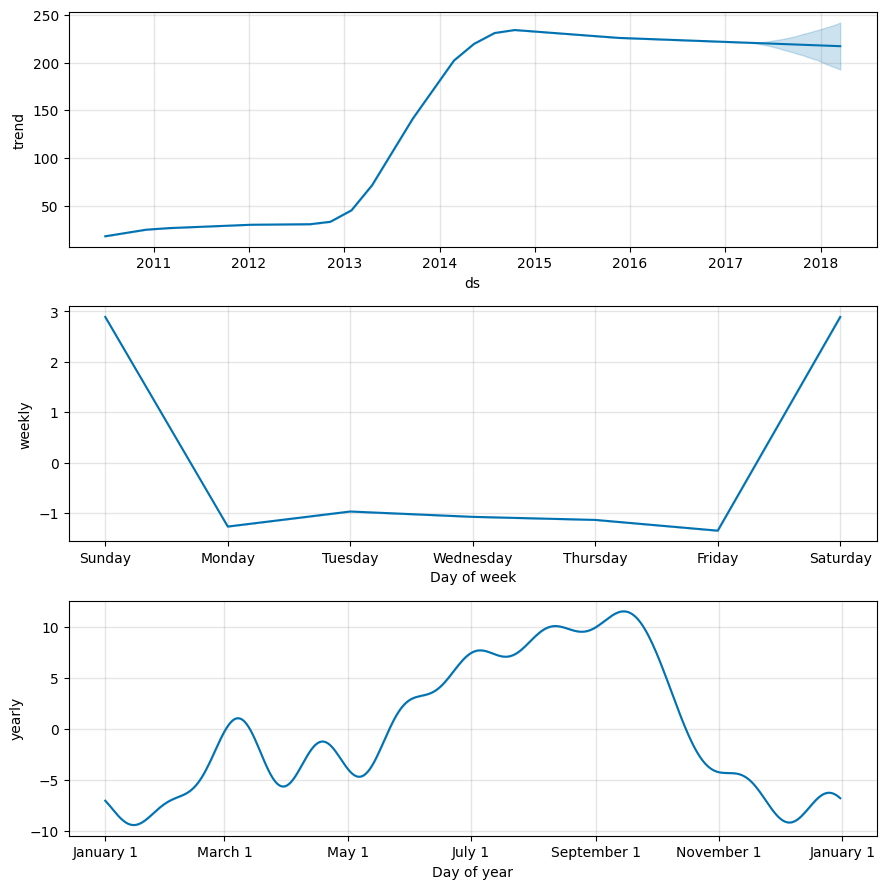

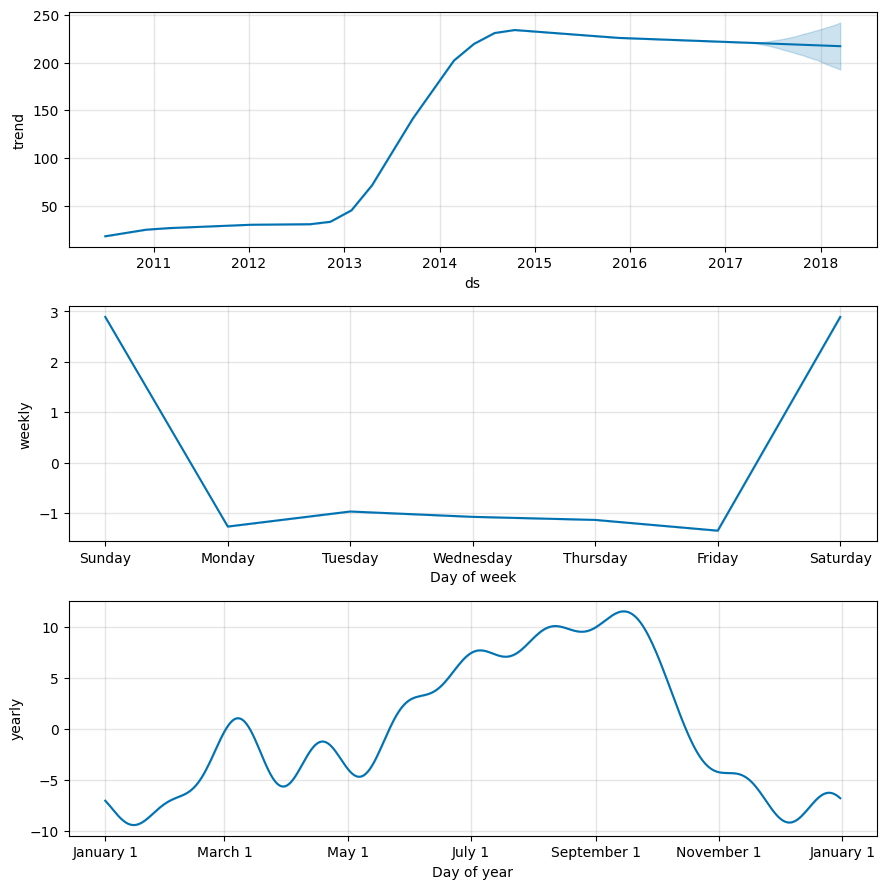

In [26]:
model.plot_components(forecast)